## 线性回归API简单应用

In [1]:
from sklearn.linear_model import LinearRegression
# 加载数据
x = [[80, 86],
     [82, 80],
     [85, 78],
     [90, 90],
     [86, 82],
     [82, 90],
     [78, 80],
     [92, 94]]

y = [84.2, 80.6, 80.1, 90, 83.2, 87.6, 79.4, 93.4]
# 实例化线性回归的API
estimator = LinearRegression()
# 使用fit方法训练模型
estimator.fit(x,y)
# 打印模型的回归系数
print(estimator.coef_)
# 利用模型进行预测
estimator.predict([[100,80]])

[0.3 0.7]


array([86.])

## 正规方程

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression


if __name__ == '__main__':

     # 特征值
     x = np.mat([[80, 86],
                 [82, 80],
                 [85, 78],
                 [90, 90],
                 [86, 82],
                 [82, 90],
                 [78, 80],
                 [92, 94]])

     # 目标值
     y = np.mat([84.2, 80.6, 80.1, 90, 83.2, 87.6, 79.4, 93.4]).transpose()

     # 给特征值增加一列1
     ones_array = np.ones([len(x), 1])
     x = np.hstack([ones_array, x])

     # 使用正规方程公式计算 w、b
     w = (x.transpose() * x) ** -1 * x.transpose() * y
     print('[%.1f %.1f %.1f]' % (w[0][0], w[1][0], w[2][0]))

     # 使用 LinearRegression 求解
     estimator = LinearRegression(fit_intercept=True)
     estimator.fit(x, y)
     print(estimator.coef_[0])

[0.0 0.3 0.7]
[0.  0.3 0.7]


## 波士顿房价预测

In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

def linear_model1():
     """
     正规方程
     :return:
     """
     # 1获取数据
     data = load_boston()
     # 2 训练集测试集划分
     x_train,x_test,y_train,y_test = train_test_split(data.data,data.target,random_state = 22)
     # 3特征工程-标准化
     transformer = StandardScaler()
     x_train = transformer.fit_transform(x_train)
     x_test = transformer.transform(x_test)
     # 4 利用线性回归(正规方程) 解决问题
     estimator = LinearRegression()
     estimator.fit(x_train,y_train)
     # 5 模型评估
     y_predict = estimator.predict(x_test)
     print('预测结果为',y_predict)
     print('模型中的系数',estimator.coef_)
     print('模型中的截距',estimator.intercept_)

     error = mean_squared_error(y_test,y_predict)
     print('误差为:',error)

In [4]:
def linear_model2():
     """
     随机梯度下降
     :return:
     """
     # 1获取数据
     data = load_boston()
     # 2 训练集测试集划分
     x_train,x_test,y_train,y_test = train_test_split(data.data,data.target,random_state = 22)
     # 3特征工程-标准化
     transformer = StandardScaler()
     x_train = transformer.fit_transform(x_train)
     x_test = transformer.transform(x_test)
     # 4 利用线性回归(正规方程) 解决问题
     estimator = SGDRegressor(max_iter=1000)
     estimator.fit(x_train,y_train)
     # 5 模型评估
     y_predict = estimator.predict(x_test)
     print('预测结果为',y_predict)
     print('模型中的系数',estimator.coef_)
     print('模型中的截距',estimator.intercept_)

     error = mean_squared_error(y_test,y_predict)
     print('误差为:',error)
     return estimator

In [5]:
linear_model2()

预测结果为 [28.38459616 31.49483876 21.47542873 32.61540839 20.61538071 19.30203947
 21.32472873 19.73655794 19.96453809 32.63538004 21.27997956 27.06284703
 15.56609883 20.06697657 37.06915739 18.3174361  10.18052532 18.87498216
 31.025915   24.281144   19.22227056 34.0549659  29.40628168 17.33472465
 34.73258942 26.15787978 33.94881887 27.47113612 19.19775117 16.54132588
 30.77327598 13.95991192 37.38894365  9.54031155 16.6659367  16.51890499
  8.08456523 19.72070074 40.51447756 29.63369103 25.38620666 18.08413999
 39.83686684  6.60411877 21.35378728 24.82349764 21.34204137 20.81192748
 16.85803695 26.50722591  9.81442946 26.93914667 30.69724562 16.8598563
  9.77084739 35.37080101 30.83711367 23.43075517 17.70926885 22.19054516
 23.46723549 23.74205895 20.69508429 38.03253276 26.11230497 19.67448706
 14.43522549  6.68443064 42.70082787 21.78145528 16.25441717 23.13082516
 41.09905235 21.91853187 36.89813093 26.98796934 22.64770871 20.61282692
 25.46219216 24.7173878  31.58445994 20.174001

SGDRegressor()

In [6]:
import joblib
estimator = linear_model2()
joblib.dump(estimator,'model/test.pkl')

预测结果为 [28.28414942 31.52027043 21.51340134 32.56692312 20.21937355 19.29752884
 21.44908786 19.40710476 19.63830704 32.79020034 21.43805181 27.42931502
 15.82776586 20.10009593 36.88295706 18.80174833  9.84079218 18.67441584
 30.58783813 24.21438446 19.28191004 33.93913517 29.45248918 17.69009314
 34.64895111 26.50865758 34.13863252 27.17603066 19.38635878 15.60020487
 30.71740954 14.75564533 37.15260299  9.07797595 16.46286369 17.15479702
  8.1428229  20.01837416 40.16494026 28.9481165  25.19915359 18.042386
 39.1674042   7.16564088 21.7841095  25.04491438 20.92218627 20.78198541
 17.12402328 26.47522286  9.94095331 27.08474055 30.50759404 16.99717545
  9.90223133 35.33315694 31.42020261 22.77007802 17.6459562  21.72951475
 23.64072347 23.97372253 20.34477932 37.929603   25.53192905 19.93479992
 14.38802605  7.17510384 42.20131563 21.81255257 17.04680792 22.44787634
 40.63481544 21.6333466  36.71649232 27.15385842 21.5761196  20.82011888
 25.18137268 23.51125368 31.34247166 20.1795379

['model/test.pkl']

In [7]:
estimator1 = joblib.load('model/test.pkl')
estimator1.coef_
estimator.intercept_

array([22.65152975])

## 过拟合欠拟合

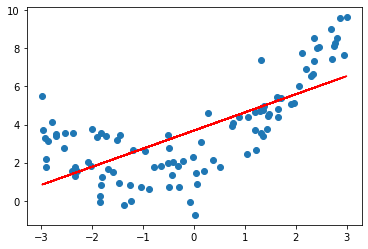

In [8]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)
x = np.random.uniform(-3,3,size = 100)
X = x.reshape(-1,1)

y = 0.5* x**2 + x+2 +np.random.normal(0,1,size = 100)

from sklearn.linear_model import LinearRegression
estimator = LinearRegression()
estimator.fit(X,y)
y_predict = estimator.predict(X)

plt.scatter(x,y) # 绘制原始数据
plt.plot(x,y_predict,color = 'r') # 绘制模型拟合出的直线
plt.show()

In [9]:
#计算均方误差
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_predict)

3.0750025765636577

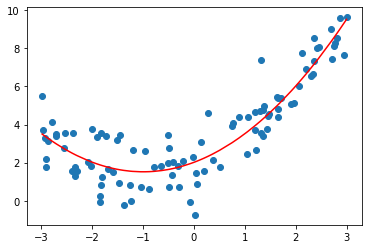

In [10]:
X2 = np.hstack([X,X**2])
estimator2 = LinearRegression()
estimator2.fit(X2,y)
y_predict2 = estimator2.predict(X2)

plt.scatter(x,y)
plt.plot(np.sort(x),y_predict2[np.argsort(x)],color = 'r')
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_predict2)

1.0987392142417858

In [12]:
estimator2.coef_

array([1.00211316, 0.50409402])

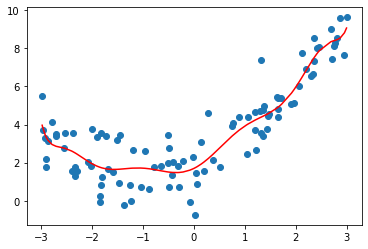

1.0508466763764135

In [13]:
X5 = np.hstack([X2,X**3,X**4,X**5,X**6,X**7,X**8,X**9,X**10])

estimator3 = LinearRegression()
estimator3.fit(X5,y)
y_predict5 = estimator3.predict(X5)

plt.scatter(x,y)
plt.plot(np.sort(x),y_predict5[np.argsort(x)],color = 'r')
plt.show()

error = mean_squared_error(y, y_predict5)
error

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 5)
estimator = LinearRegression()
estimator.fit(X_train,y_train)
y_predict = estimator.predict(X_test)

mean_squared_error(y_test,y_predict)

3.153139806483088

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X2,y,random_state = 5)
estimator = LinearRegression()
estimator.fit(X_train,y_train)
y_predict = estimator.predict(X_test)
mean_squared_error(y_test,y_predict)

1.111873885731967

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X5,y,random_state = 5)
estimator = LinearRegression()
estimator.fit(X_train,y_train)
y_predict = estimator.predict(X_test)
mean_squared_error(y_test,y_predict)

1.4145580542297793

## L1 和 L2正则

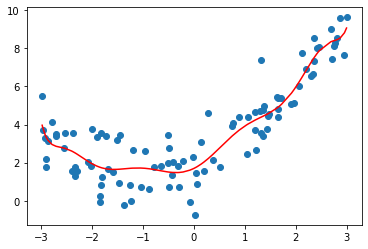

[ 1.32292089e+00  2.03952017e+00 -2.88731664e-01 -1.24760429e+00
  8.06147066e-02  3.72878513e-01 -7.75395040e-03 -4.64121137e-02
  1.84873446e-04  2.03845917e-03]


In [20]:
X10 = np.hstack([X2,X**3,X**4,X**5,X**6,X**7,X**8,X**9,X**10])
estimator3 = LinearRegression()
estimator3.fit(X10,y)
y_predict3 = estimator3.predict(X10)

plt.scatter(x,y)
plt.plot(np.sort(x),y_predict3[np.argsort(x)],color = 'r')
plt.show()

print(estimator3.coef_)

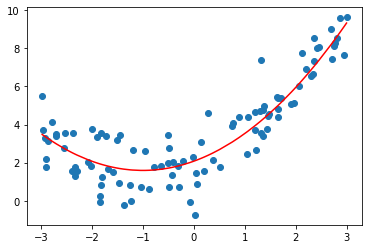

[ 0.97284077  0.4850203   0.          0.         -0.          0.
 -0.          0.         -0.          0.        ]


In [21]:
from sklearn.linear_model import Lasso  # L1正则
from sklearn.linear_model import Ridge  # 岭回归 L2正则

X10 = np.hstack([X2,X**3,X**4,X**5,X**6,X**7,X**8,X**9,X**10])
estimator_l1 = Lasso(alpha=0.005,normalize=True) # 调整alpha 正则化强度 查看正则化效果
estimator_l1.fit(X10,y)
y_predict_l1 = estimator_l1.predict(X10)

plt.scatter(x,y)
plt.plot(np.sort(x),y_predict_l1[np.argsort(x)],color = 'r')
plt.show()

print(estimator_l1.coef_)  # Lasso 回归  L1正则 会将高次方项系数变为0

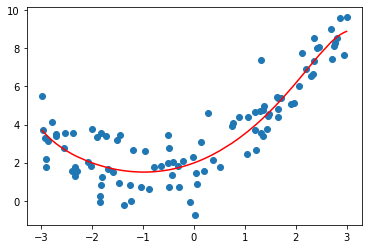

[ 9.91283840e-01  5.24820573e-01  1.57614237e-02  2.34128982e-03
  7.26947948e-04 -2.99893698e-04 -8.28333499e-05 -4.51949529e-05
 -4.21312015e-05 -8.22992826e-07]


In [22]:
X10 = np.hstack([X2,X**3,X**4,X**5,X**6,X**7,X**8,X**9,X**10])
estimator_l2 = Ridge(alpha=0.005,normalize=True) # 调整alpha 正则化强度 查看正则化效果
estimator_l2.fit(X10,y)
y_predict_l2 = estimator_l2.predict(X10)

plt.scatter(x,y)
plt.plot(np.sort(x),y_predict_l2[np.argsort(x)],color = 'r')
plt.show()

print(estimator_l2.coef_ )